In [ ]:
pwd

'/content'

In [ ]:
mkdir offsigver

In [ ]:
ls

bin@      dev/   lib32@   mnt/                      python-apt/  srv/    usr/
boot/     etc/   lib64@   NGC-DL-CONTAINER-LICENSE  root/        sys/    var/
content/  home/  libx32@  opt/                      run/         tmp/
datalab/  lib@   media/   proc/                     sbin@        tools/


In [ ]:
cd ..

/


In [ ]:
cd root

/root


In [ ]:
mkdir .kaggle

In [ ]:
cd .kaggle

/root/.kaggle


In [ ]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
cd ..

/root


In [ ]:
cd ..

/


In [ ]:
cd content/offsigver/

/content/offsigver


In [ ]:
!kaggle datasets download -d robinreni/signature-verification-dataset

 97% 583M/601M [00:03<00:00, 174MB/s]
100% 601M/601M [00:04<00:00, 154MB/s]


In [ ]:
!unzip signature-verification-dataset.zip

Archive:  signature-verification-dataset.zip
  inflating: sign_data/sign_data/test/049/01_049.png  
  inflating: sign_data/sign_data/test/049/02_049.png  
  inflating: sign_data/sign_data/test/049/03_049.png  
  inflating: sign_data/sign_data/test/049/04_049.png  
  inflating: sign_data/sign_data/test/049/05_049.png  
  inflating: sign_data/sign_data/test/049/06_049.png  
  inflating: sign_data/sign_data/test/049/07_049.png  
  inflating: sign_data/sign_data/test/049/08_049.png  
  inflating: sign_data/sign_data/test/049/09_049.png  
  inflating: sign_data/sign_data/test/049/10_049.png  
  inflating: sign_data/sign_data/test/049/11_049.png  
  inflating: sign_data/sign_data/test/049/12_049.png  
  inflating: sign_data/sign_data/test/049_forg/01_0114049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0206049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0210049.PNG  
  inflating: sign_data/sign_data/test/049_forg/02_0114049.PNG  
  inflating: sign_data/sign_data/test/0

In [ ]:
# Import all the necessary Library
import torchvision
import torch.utils.data as utils
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision.utils
import numpy as np
import time
import copy
from torch.optim import lr_scheduler
import os
from PIL import Image
import torch
import PIL.ImageOps
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import pandas as pd

In [ ]:
def imshow(img,text=None,should_save=False):
    npimg = img.numpy()
    plt.axis("off")
    if text:
        plt.text(75, 8, text, style='italic',fontweight='bold',
            bbox={'facecolor':'white', 'alpha':0.8, 'pad':10})
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()

In [ ]:
class Config():
    training_dir = "/content/offsigver/sign_data/train"
    testing_dir = "/content/offsigver/sign_data/test"
    train_batch_size = 32
    train_number_epochs = 20

In [ ]:
training_dir="/content/offsigver/sign_data/train"
training_csv="/content/offsigver/sign_data/train_data.csv"
testing_csv="/content/offsigver/sign_data/test_data.csv"
testing_dir="/content/offsigver/sign_data/test"

In [ ]:
class SiameseNetworkDataset():

    def __init__(self,training_csv=None,training_dir=None,transform=None):

        self.training_df=pd.read_csv(training_csv)
        self.training_df.columns =["image1","image2","label"]
        self.training_dir = training_dir
        self.transform = transform

    def __getitem__(self,index):


        image1_path=os.path.join(self.training_dir,self.training_df.iat[index,0])
        image2_path=os.path.join(self.training_dir,self.training_df.iat[index,1])



        img0 = Image.open(image1_path)
        img1 = Image.open(image2_path)
        img0 = img0.convert("L")
        img1 = img1.convert("L")


        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)

        return img0, img1 , torch.from_numpy(np.array([int(self.training_df.iat[index,2])],dtype=np.float32))

    def __len__(self):
        return len(self.training_df)

In [ ]:
siamese_dataset = SiameseNetworkDataset(training_csv,training_dir,
                                        transform=transforms.Compose([transforms.Resize((105,105)),
                                                                      transforms.ToTensor()
                                                                      ]))

In [ ]:
a=[]
b=[]
for i in len(siamese_dataset):
  a.append(siamese_dataset[i][0],siamese_dataset[i][1])
  b.append(siamese_dataset[i][2])
b=np.array(b)
a=np.array(a)

(tensor([[[0.9804, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
          [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
          [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
          ...,
          [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
          [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
          [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843]]]),
 tensor([[[0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9804],
          [0.9843, 0.9804, 0.9804,  ..., 0.9843, 0.9843, 0.9843],
          [0.9804, 0.9843, 0.9804,  ..., 0.9843, 0.9843, 0.9843],
          ...,
          [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
          [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9804],
          [0.9843, 0.9843, 0.9843,  ..., 0.9725, 0.9843, 0.9843]]]),
 tensor([1.]))

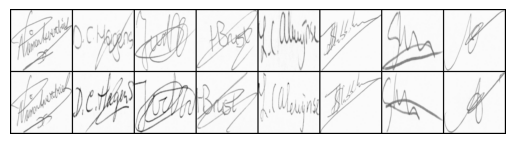

In [ ]:
vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())

In [ ]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()


        self.cnn1 = nn.Sequential(

            nn.Conv2d(1, 96, kernel_size=11,stride=1),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5,stride=1,padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),

            nn.Conv2d(256,384 , kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384,256 , kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),

        )


        self.fc1 = nn.Sequential(
            nn.Linear(30976, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.5),

            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128,2))



    def forward_once(self, x):

        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):

        output1 = self.forward_once(input1)

        output2 = self.forward_once(input2)
        return output1, output2

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [ ]:
class ContrastiveLoss(torch.nn.Module):


    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        diff = output1 - output2
        dist_sq = torch.sum(torch.pow(diff, 2), 1)
        dist = torch.sqrt(dist_sq)

        mdist = self.margin - dist
        dist = torch.clamp(mdist, min=0.0)
        loss = (1 - label) * dist_sq +  label* torch.pow(dist, 2)
        loss = torch.sum(loss) / 2.0 / output1.size()[0]
        return loss

In [ ]:
train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=Config.train_batch_size)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
net = SiameseNetwork().cuda()

criterion = ContrastiveLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.0005)

In [ ]:
def train():
    counter = []
    loss_history = []
    iteration_number= 0

    for epoch in range(1,Config.train_number_epochs):
        for i, data in enumerate(train_dataloader,0):
            img0, img1 , label = data
            img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
            optimizer.zero_grad()
            output1,output2 = net(img0,img1)
            loss_contrastive = criterion(output1,output2,label)
            loss_contrastive.backward()
            optimizer.step()

        print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
        iteration_number +=10
        counter.append(iteration_number)
        loss_history.append(loss_contrastive.item())
    show_plot(counter,loss_history)
    return net

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch number 1
 Current loss 0.7197543978691101

Epoch number 2
 Current loss 0.9113485217094421

Epoch number 3
 Current loss 0.6645825505256653

Epoch number 4
 Current loss 0.9407477378845215

Epoch number 5
 Current loss 0.8142566680908203

Epoch number 6
 Current loss 0.979653537273407

Epoch number 7
 Current loss 0.7105607390403748

Epoch number 8
 Current loss 0.707147479057312

Epoch number 9
 Current loss 0.677156388759613

Epoch number 10
 Current loss 0.7168955206871033

Epoch number 11
 Current loss 0.9202971458435059

Epoch number 12
 Current loss 0.7183072566986084

Epoch number 13
 Current loss 0.6135905981063843

Epoch number 14
 Current loss 0.7911178469657898

Epoch number 15
 Current loss 0.6280393004417419

Epoch number 16
 Current loss 0.5495173335075378

Epoch number 17
 Current loss 0.7341552376747131

Epoch number 18
 Current loss 0.8235155344009399

Epoch number 19
 Current loss 0.6908696293830872



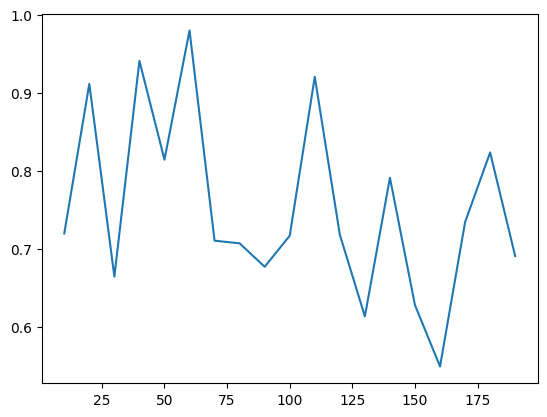

Model Saved Successfully


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Train the model
model = train()
torch.save(model.state_dict(), "model.pt")
print("Model Saved Successfully")

In [ ]:
# Load the saved model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SiameseNetwork().to(device)
model.load_state_dict(torch.load("model.pt"))


<All keys matched successfully>

In [ ]:
# Load the test dataset
test_dataset = SiameseNetworkDataset(training_csv=testing_csv,training_dir=testing_dir,
                                        transform=transforms.Compose([transforms.Resize((105,105)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       )

test_dataloader = DataLoader(test_dataset,num_workers=6,batch_size=1,shuffle=True)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


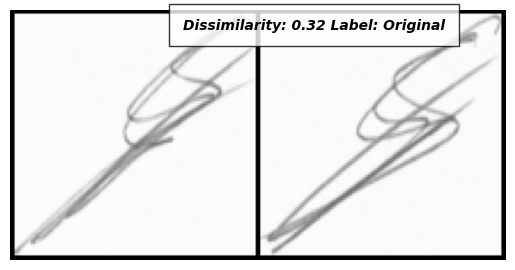

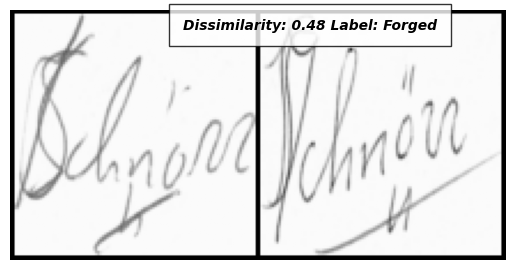

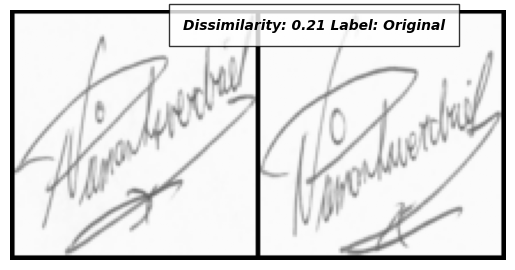

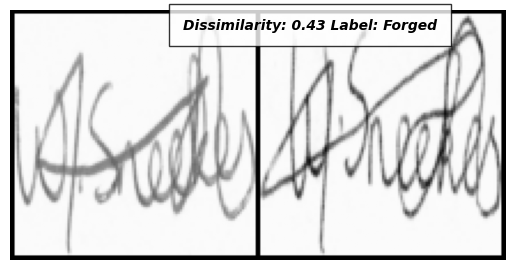

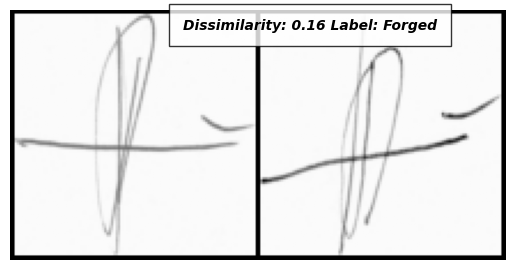

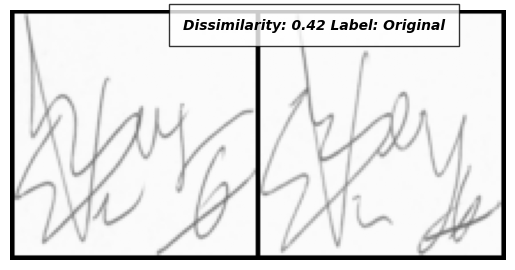

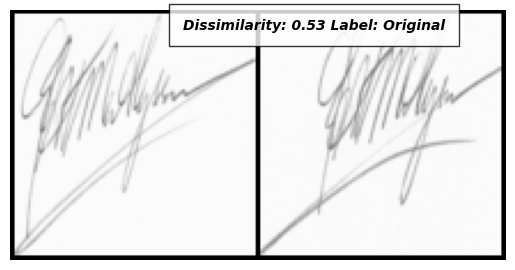

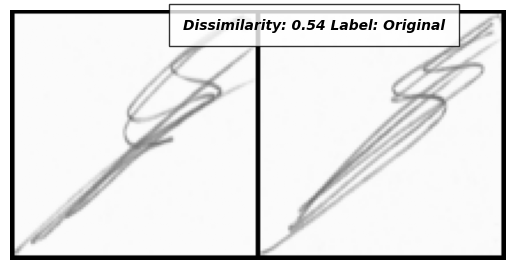

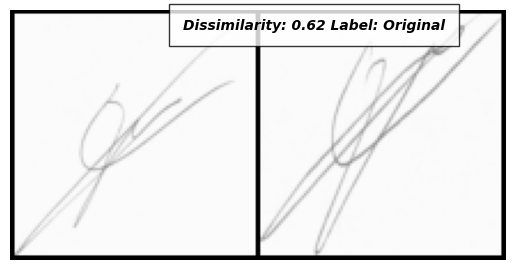

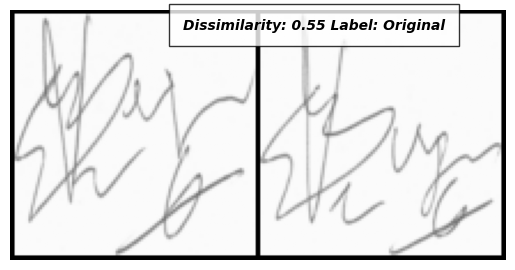

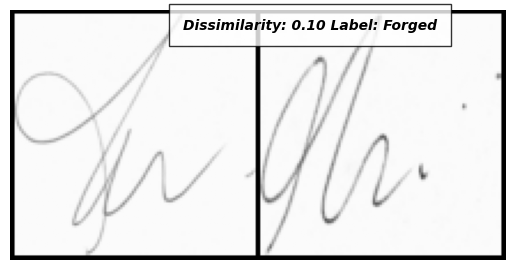

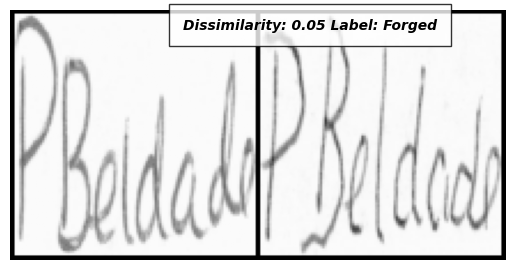

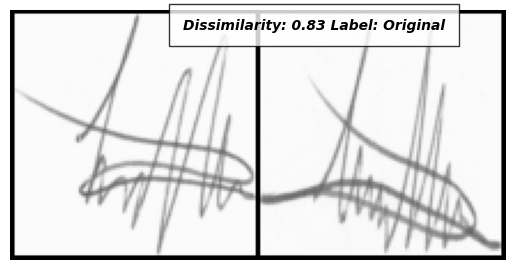

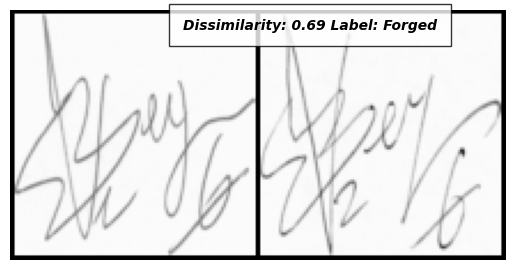

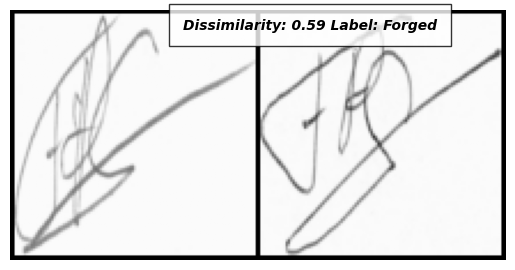

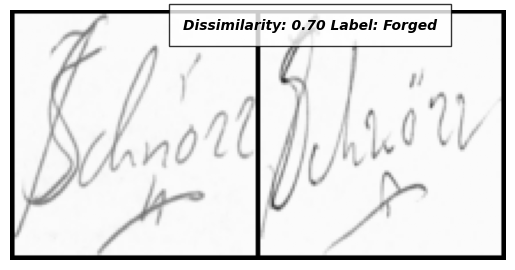

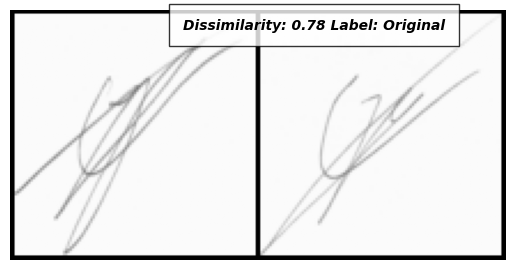

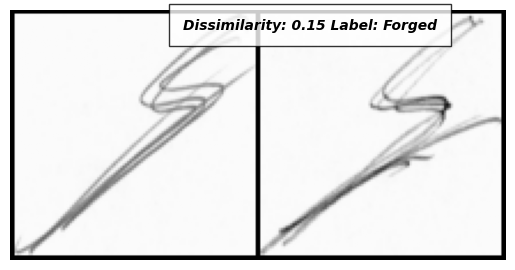

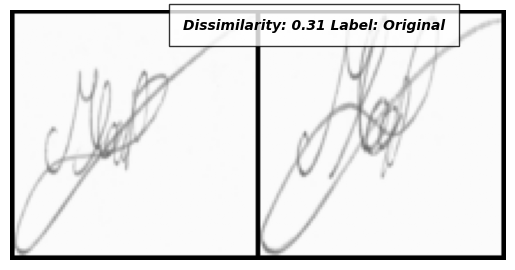

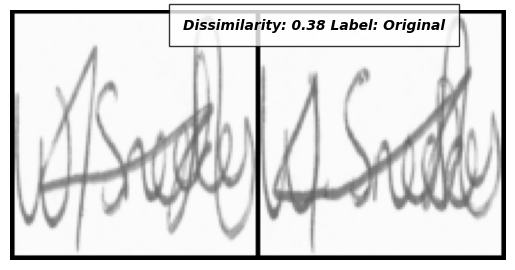

0.4823386114494519


In [ ]:
# Print the sample outputs to view its dissimilarity
counter=0
list_0 = torch.FloatTensor([[0]])
acc=[]
l1=''
for i, data in enumerate(test_dataloader,0):
  x0, x1 , label = data
  concatenated = torch.cat((x0,x1),0)
  output1,output2 = model(x0.to(device),x1.to(device))
  eucledian_distance = F.pairwise_distance(output1, output2)
  if label==list_0:
    label="Original"
  else:
    label="Forged"
  if(counter <20):
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f} Label: {}'.format(eucledian_distance.item(),label))
    counter=counter+1

  if(eucledian_distance < 1.0):
      l1 = "Original"

  else:
      l1 = "Forged"

  if(l1 == label):
      acc.append(1)
  else:
      acc.append(0)

accuracy = acc.count(1)/len(acc)
print(accuracy)

